In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# NaN값 유무 확인
df.isnull().sum().sum()

207

In [5]:
#컬럼별로 NaN값 갯수 출력
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#NaN값이 있는 row를 삭제하기
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### total_rooms 와 total_bedrooms를 median으로 바꿔줌

In [8]:
df['median_rooms'] = df['total_rooms'] / df['households']
df['median_bedrooms'] = df['total_bedrooms'] / df['households']

/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/2411067719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_rooms'] = df['total_rooms'] / df['households']
/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/2411067719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_bedrooms'] = df['total_bedrooms'] / df['households']


In [9]:
df = df.drop(['total_rooms', 'total_bedrooms'], axis=1)
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,median_rooms,median_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920


In [10]:
df.describe()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,median_rooms,median_bedrooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,1424.946949,499.433465,3.871162,206864.413155,5.431344,1.097062
std,2.003578,2.136348,12.591805,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.476104
min,-124.350000,32.540000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333
25%,-121.800000,33.930000,18.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,1.006029
50%,-118.490000,34.260000,29.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,1.048889
75%,-118.010000,37.720000,37.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,1.099631
max,-114.310000,41.950000,52.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_rooms'}>,
        <AxesSubplot:title={'center':'median_bedrooms'}>]], dtype=object)

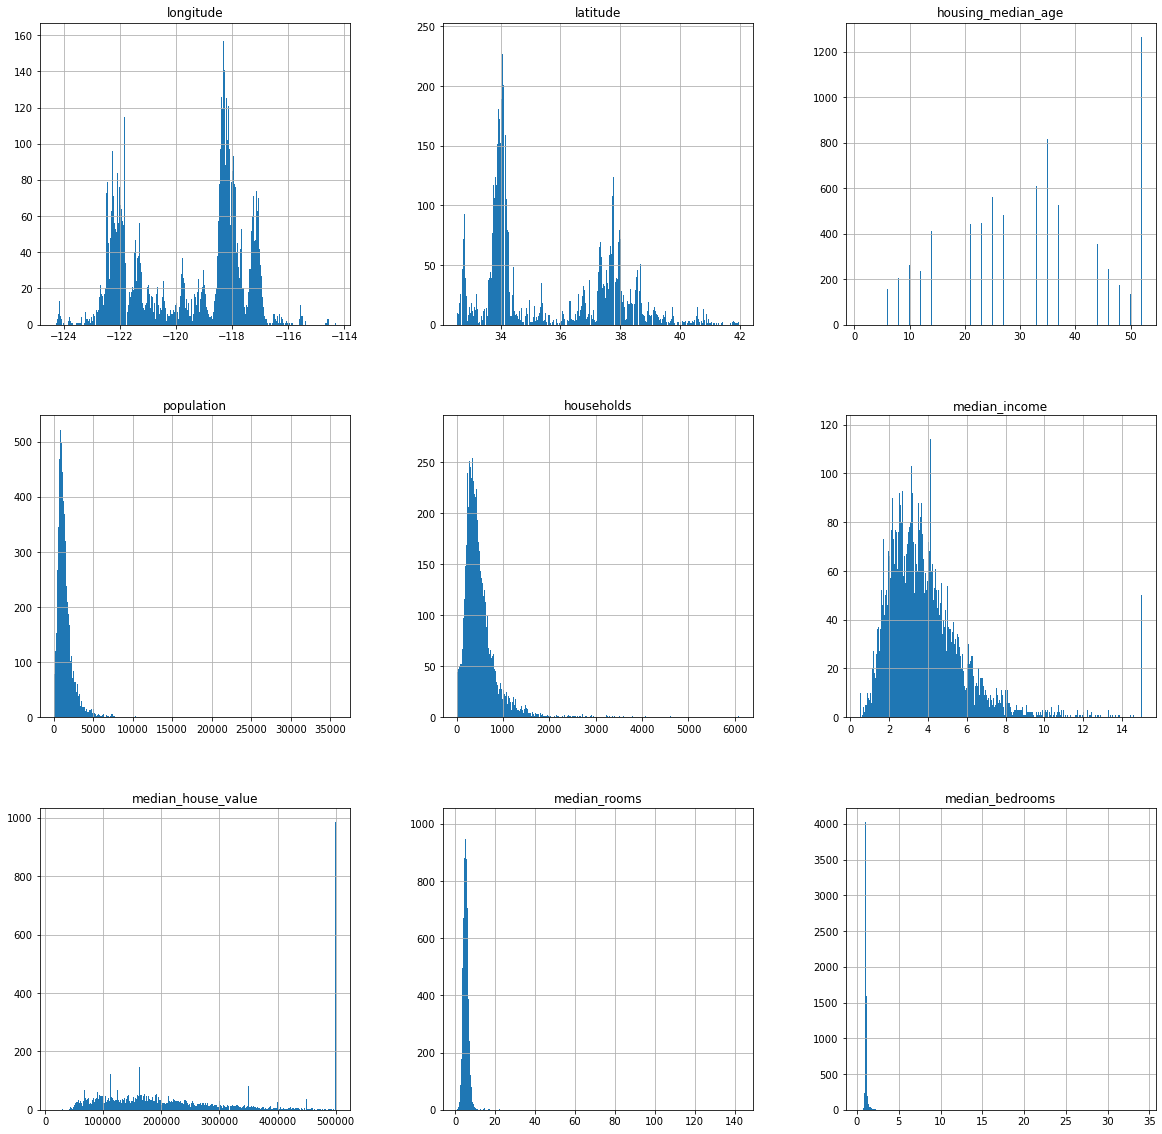

In [11]:
df.hist(bins=1000, figsize=(20,20))

### population, households, median_income을 nonlinear tranform해준다

In [12]:
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)
df['median_income'] = np.log(df['median_income'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_rooms'}>,
        <AxesSubplot:title={'center':'median_bedrooms'}>]], dtype=object)

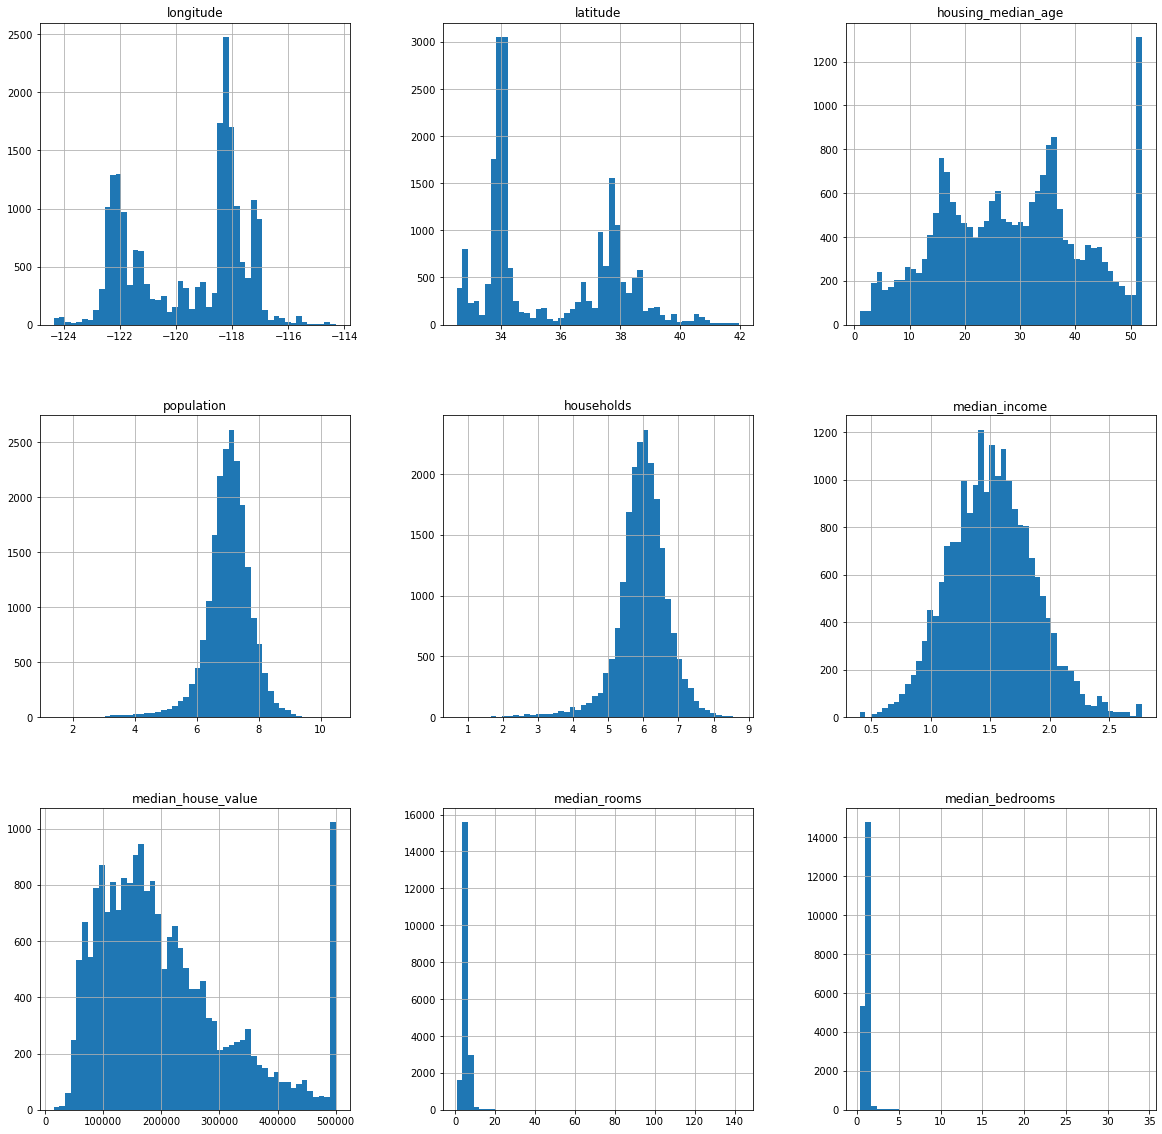

In [13]:
df.hist(bins=50, figsize=(20,20))

In [14]:
df.describe()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,median_rooms,median_bedrooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.025121,5.984538,1.517119,206864.413155,5.431344,1.097062
std,2.003578,2.136348,12.591805,0.736336,0.726856,0.358647,115435.667099,2.482946,0.476104
min,-124.350000,32.540000,1.000000,1.386294,0.693147,0.405398,14999.000000,0.846154,0.333333
25%,-121.800000,33.930000,18.000000,6.669498,5.638355,1.270799,119500.000000,4.441441,1.006029
50%,-118.490000,34.260000,29.000000,7.062192,6.016157,1.512156,179700.000000,5.230769,1.048889
75%,-118.010000,37.720000,37.000000,7.451822,6.405228,1.748156,264700.000000,6.052381,1.099631
max,-114.310000,41.950000,52.000000,10.482430,8.713253,2.772595,500001.000000,141.909091,34.066667


### binning 적용(for [median_income, median_rooms, median_bedrooms])

In [15]:
#for median_income
bins_income = np.linspace(0.4, 2.8, 16)
print('bins : ', bins_income)
which_bin = np.digitize(df['median_income'], bins = bins_income)

bins :  [0.4  0.56 0.72 0.88 1.04 1.2  1.36 1.52 1.68 1.84 2.   2.16 2.32 2.48
 2.64 2.8 ]


In [16]:
which_bin

array([12, 12, 11, ...,  4,  5,  6])

In [17]:
df['income_digitize'] = which_bin

In [18]:
#for median_rooms
bins_rooms = np.linspace(0.8, 7, 16)
print('bins : ', bins_rooms)
which_bin = np.digitize(df['median_rooms'], bins = bins_rooms)

bins :  [0.8        1.21333333 1.62666667 2.04       2.45333333 2.86666667
 3.28       3.69333333 4.10666667 4.52       4.93333333 5.34666667
 5.76       6.17333333 6.58666667 7.        ]


In [19]:
which_bin

array([15, 14, 16, ..., 11, 11, 11])

In [20]:
df['rooms_digitize'] = which_bin

In [21]:
#for median_bedrooms
bins_bedrooms = np.linspace(1, 1.1, 16)
print('bins : ', bins_bedrooms)
which_bin = np.digitize(df['median_bedrooms'], bins = bins_bedrooms)

bins :  [1.         1.00666667 1.01333333 1.02       1.02666667 1.03333333
 1.04       1.04666667 1.05333333 1.06       1.06666667 1.07333333
 1.08       1.08666667 1.09333333 1.1       ]


In [22]:
which_bin

array([ 4,  0, 12, ..., 16, 16, 16])

In [23]:
df['bedrooms_digitize'] = which_bin

In [24]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,median_rooms,median_bedrooms,income_digitize,rooms_digitize,bedrooms_digitize
0,-122.23,37.88,41.0,5.777652,4.844187,2.232720,452600.0,NEAR BAY,6.984127,1.023810,12,15,4
1,-122.22,37.86,21.0,7.784057,7.037906,2.230165,358500.0,NEAR BAY,6.238137,0.971880,12,14,0
2,-122.24,37.85,52.0,6.208590,5.181784,2.111110,352100.0,NEAR BAY,8.288136,1.073446,11,16,12
3,-122.25,37.85,52.0,6.326149,5.393628,1.893579,341300.0,NEAR BAY,5.817352,1.073059,10,13,11
4,-122.25,37.85,52.0,6.338594,5.560682,1.578195,342200.0,NEAR BAY,6.281853,1.081081,8,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,6.740519,5.802118,0.940124,78100.0,INLAND,5.045455,1.133333,4,11,16
20636,-121.21,39.49,18.0,5.877736,4.744932,1.268861,77100.0,INLAND,6.114035,1.315789,6,13,16
20637,-121.22,39.43,17.0,6.915723,6.073045,0.993252,92300.0,INLAND,5.205543,1.120092,4,11,16
20638,-121.32,39.43,18.0,6.609349,5.857933,1.053336,84700.0,INLAND,5.329513,1.171920,5,11,16


### One-Hot Encoding 적용

In [25]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
df_dummies = pd.get_dummies(df)
df_dummies

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,median_rooms,median_bedrooms,income_digitize,rooms_digitize,bedrooms_digitize,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,5.777652,4.844187,2.232720,452600.0,6.984127,1.023810,12,15,4,0,0,0,1,0
1,-122.22,37.86,21.0,7.784057,7.037906,2.230165,358500.0,6.238137,0.971880,12,14,0,0,0,0,1,0
2,-122.24,37.85,52.0,6.208590,5.181784,2.111110,352100.0,8.288136,1.073446,11,16,12,0,0,0,1,0
3,-122.25,37.85,52.0,6.326149,5.393628,1.893579,341300.0,5.817352,1.073059,10,13,11,0,0,0,1,0
4,-122.25,37.85,52.0,6.338594,5.560682,1.578195,342200.0,6.281853,1.081081,8,14,13,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,6.740519,5.802118,0.940124,78100.0,5.045455,1.133333,4,11,16,0,1,0,0,0
20636,-121.21,39.49,18.0,5.877736,4.744932,1.268861,77100.0,6.114035,1.315789,6,13,16,0,1,0,0,0
20637,-121.22,39.43,17.0,6.915723,6.073045,0.993252,92300.0,5.205543,1.120092,4,11,16,0,1,0,0,0
20638,-121.32,39.43,18.0,6.609349,5.857933,1.053336,84700.0,5.329513,1.171920,5,11,16,0,1,0,0,0


### Filter-method로 feature 고르기

#### feature : housing_median_age, population, households, income_digitize, rooms_digitize,  ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY,	ocean_proximity_NEAR OCEAN

#### target : median_house_value

In [27]:
#특정 feature들만 뽑아내기
final_df = df_dummies[['housing_median_age', 'population', 'households', 'income_digitize', 'rooms_digitize', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

In [28]:
#타겟값 컬럼을 추가
final_df['median_house_value'] = df_dummies['median_house_value']

/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/956498982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['median_house_value'] = df_dummies['median_house_value']


In [29]:
final_df

,housing_median_age,population,households,income_digitize,rooms_digitize,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,41.0,5.777652,4.844187,12,15,0,0,0,1,0,452600.0
1,21.0,7.784057,7.037906,12,14,0,0,0,1,0,358500.0
2,52.0,6.208590,5.181784,11,16,0,0,0,1,0,352100.0
3,52.0,6.326149,5.393628,10,13,0,0,0,1,0,341300.0
4,52.0,6.338594,5.560682,8,14,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,6.740519,5.802118,4,11,0,1,0,0,0,78100.0
20636,18.0,5.877736,4.744932,6,13,0,1,0,0,0,77100.0
20637,17.0,6.915723,6.073045,4,11,0,1,0,0,0,92300.0
20638,18.0,6.609349,5.857933,5,11,0,1,0,0,0,84700.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#스케일링
scaler = StandardScaler()
col_1 = scaler.fit_transform(final_df['population'].values.reshape(-1,1))
final_df['population_scaled'] = col_1
final_df.drop(['population'], axis=1, inplace=True)

col_2 = scaler.fit_transform(final_df['households'].values.reshape(-1,1))
final_df['households_scaled'] = col_2
final_df.drop(['households'], axis=1, inplace=True)


col_3 = scaler.fit_transform(final_df['median_house_value'].values.reshape(-1,1))
final_df['target_scaled'] = col_3
final_df.drop(['median_house_value'], axis=1, inplace=True)

#train, test split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, :-1], final_df.iloc[:, -1], random_state=10)

/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/1451090220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['population_scaled'] = col_1
/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/1451090220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(['population'], axis=1, inplace=True)
/var/folders/qx/s5jzx0mn4kq2wlnxgdksc5pm0000gn/T/ipykernel_13968/1451090220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [31]:
final_df

,housing_median_age,income_digitize,rooms_digitize,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,population_scaled,households_scaled,target_scaled
0,41.0,12,15,0,0,0,1,0,-1.694198,-1.568921,2.128819
1,21.0,12,14,0,0,0,1,0,1.030718,1.449247,1.313626
2,52.0,11,16,0,0,0,1,0,-1.108938,-1.104448,1.258183
3,52.0,10,13,0,0,0,1,0,-0.949279,-0.812988,1.164622
4,52.0,8,14,0,0,0,1,0,-0.932378,-0.583151,1.172418
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,4,11,0,1,0,0,0,-0.386520,-0.250977,-1.115492
20636,18.0,6,13,0,1,0,0,0,-1.558274,-1.705478,-1.124155
20637,17.0,4,11,0,1,0,0,0,-0.148573,0.121769,-0.992477
20638,18.0,5,11,0,1,0,0,0,-0.564663,-0.174186,-1.058316


In [32]:
final_df.describe()

,housing_median_age,income_digitize,rooms_digitize,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,population_scaled,households_scaled,target_scaled
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,2.043300e+04,2.043300e+04,2.043300e+04
mean,28.633094,7.479029,11.267411,0.442128,0.317917,0.000245,0.111095,0.128615,-1.385627e-15,4.865491e-16,-1.025841e-16
std,12.591805,2.254653,2.761242,0.496652,0.465678,0.015641,0.314257,0.334782,1.000024e+00,1.000024e+00,1.000024e+00
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.658141e+00,-7.280016e+00,-1.662139e+00
25%,18.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.829743e-01,-4.762871e-01,-7.568419e-01
50%,29.000000,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.034630e-02,4.350214e-02,-2.353266e-01
75%,37.000000,9.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.795071e-01,5.787953e-01,5.010323e-01
max,52.000000,15.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.695402e+00,3.754229e+00,2.539456e+00


### 모델링

#### linear regression

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = reg.predict(X_train)
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))  #작을수록 좋음
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)  #작을수록 좋음
print('train R_square : ', r2_score(y_train, y_train_hat))   #1에 가까울수록 좋음
y_test_hat = reg.predict(X_test)
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))  #작을수록 좋음
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)  #작을수록 좋음
print('test R_square : ', r2_score(y_test, y_test_hat))   #1에 가까울수록 좋음

train MAE :  0.4671256133709499
train RMSE :  0.6225615356515433
train R_square :  0.6142206697627024
test MAE :  0.4627800186919634
test RMSE :  0.6217963413428167
test R_square :  0.6078695664566942


#### Ridge regression

In [35]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

Ridge(alpha=1)

In [36]:
y_train_hat = reg.predict(X_train)
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))  #작을수록 좋음
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)  #작을수록 좋음
print('train R_square : ', r2_score(y_train, y_train_hat))   #1에 가까울수록 좋음
y_test_hat = reg.predict(X_test)
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))  #작을수록 좋음
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)  #작을수록 좋음
print('test R_square : ', r2_score(y_test, y_test_hat))   #1에 가까울수록 좋음

train MAE :  0.46714895067442425
train RMSE :  0.6225741362748446
train R_square :  0.6142050532848662
test MAE :  0.4627906471061052
test RMSE :  0.6217906651488851
test R_square :  0.6078767257083009


#### Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [38]:
y_train_hat = reg.predict(X_train)
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))  #작을수록 좋음
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)  #작을수록 좋음
print('train R_square : ', r2_score(y_train, y_train_hat))   #1에 가까울수록 좋음
y_test_hat = reg.predict(X_test)
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))  #작을수록 좋음
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)  #작을수록 좋음
print('test R_square : ', r2_score(y_test, y_test_hat))   #1에 가까울수록 좋음

train MAE :  0.6721948767777003
train RMSE :  0.8574674046331228
train R_square :  0.2681709830217951
test MAE :  0.6665385824179348
test RMSE :  0.8497900750485414
test R_square :  0.26758448766379783


## 만약 feature engineering 안하고 모델 돌릴때

In [39]:
df = pd.read_csv("housing.csv")
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [40]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-2], df['median_house_value'].values, random_state=10)
#스케일링
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
scalerY.fit(y_train.reshape(-1,1))
y_train_scaled = scalerY.transform(y_train.reshape(-1,1))
y_test_scaled = scalerY.transform(y_test.reshape(-1,1))

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [42]:
y_train_hat_scaled = reg.predict(X_train_scaled)
y_train_hat = scalerY.inverse_transform(y_train_hat_scaled)
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))  #작을수록 좋음
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)  #작을수록 좋음
print('train R_square : ', r2_score(y_train, y_train_hat))   #1에 가까울수록 좋음
y_test_hat_scaled = reg.predict(X_test_scaled)
y_test_hat = scalerY.inverse_transform(y_test_hat_scaled)
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))  #작을수록 좋음
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)  #작을수록 좋음
print('test R_square : ', r2_score(y_test, y_test_hat))   #1에 가까울수록 좋음

train MAE :  51050.732448682356
train RMSE :  69829.99381312855
train R_square :  0.6357499555720671
test MAE :  50401.145468890085
test RMSE :  68773.59238366435
test R_square :  0.6399864337614787


In [43]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=1)

In [44]:
y_train_hat_scaled = reg.predict(X_train_scaled)
y_train_hat = scalerY.inverse_transform(y_train_hat_scaled)
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))  #작을수록 좋음
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)  #작을수록 좋음
print('train R_square : ', r2_score(y_train, y_train_hat))   #1에 가까울수록 좋음
y_test_hat_scaled = reg.predict(X_test_scaled)
y_test_hat = scalerY.inverse_transform(y_test_hat_scaled)
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))  #작을수록 좋음
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)  #작을수록 좋음
print('test R_square : ', r2_score(y_test, y_test_hat))   #1에 가까울수록 좋음

train MAE :  51050.5612109134
train RMSE :  69830.00289259251
train R_square :  0.6357498608507248
test MAE :  50401.665121650396
test RMSE :  68774.600774612
test R_square :  0.6399758763056258
